In [1]:
from src.etl import get_file_path, load_transactions, clean_currency_columns


path = get_file_path()

df = load_transactions(path)

df.head()


,ID,Timestamp,Transaction Type,Asset,Quantity Transacted,Price Currency,Price at Transaction,Subtotal,Total (inclusive of fees and/or spread),Fees and/or Spread,Notes
0,68c700e355b2d8098f98dbf2,2025-09-14 17:52:35 UTC,Staking Income,ETH,0.000001,PLN,zł16728.6990535592701315065337825,zł0.01978,zł0.01978,zł0.00,NaN
1,68c540ad0fbb7d9c04f33420,2025-09-13 10:00:13 UTC,Staking Income,MATIC,0.124783,PLN,zł1.023734828938927071497094725,zł0.12774,zł0.18077,zł0.053023496254588420953353937,NaN
2,68c3231492c8e85f5d7b5b58,2025-09-11 19:29:24 UTC,Staking Income,ETH,0.000004,PLN,zł16036.78199553930357654639381,zł0.06307,zł0.06307,zł0.00,NaN
3,68bf257e8991a802b518864f,2025-09-08 18:50:38 UTC,Staking Income,ETH,0.000004,PLN,zł15649.24884284174051128484748,zł0.06632,zł0.06632,zł0.00,NaN
4,68bea7eea34bc3abc6f20afe,2025-09-08 09:54:54 UTC,Staking Income,MATIC,0.174778,PLN,zł1.01113716755783026303774194,zł0.17672,zł0.25006,zł0.073331348585128168489604104,NaN


In [2]:
count_df = df.groupby("Transaction Type")["ID"].count()
print(count_df)


Transaction Type
Buy                         11
Convert                     35
Learning Reward             50
Receive                    223
Retail Eth2 Deprecation      2
Retail Staking Transfer     20
Reward Income              295
Sell                         1
Send                        20
Staking Income             360
Withdrawal                   1
Name: ID, dtype: int64


In [3]:
df.columns

Index(['ID', 'Timestamp', 'Transaction Type', 'Asset', 'Quantity Transacted',
       'Price Currency', 'Price at Transaction', 'Subtotal',
       'Total (inclusive of fees and/or spread)', 'Fees and/or Spread',
       'Notes'],
      dtype='object')

In [4]:

clean_df = clean_currency_columns(df)

In [5]:
from src.etl import convert_dates

clean_df = convert_dates(clean_df)

In [6]:
clean_df.groupby(clean_df["Timestamp"].dt.to_period("M"))["Fees and/or Spread_clean"].sum()


C:\Users\micha\AppData\Local\Temp\ipykernel_8940\3216967947.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  clean_df.groupby(clean_df["Timestamp"].dt.to_period("M"))["Fees and/or Spread_clean"].sum()


Timestamp
2021-04    13.972082
2021-05     0.753010
2021-06     0.000000
2021-07     0.000000
2021-08     0.000000
2021-09     0.000000
2021-10     0.000000
2021-11     0.000000
2021-12     0.372308
2022-01     0.190599
2022-02     0.256055
2022-03     0.000000
2022-04     0.000000
2022-05     0.000000
2022-06     4.829866
2022-07     0.000000
2022-08     7.467618
2022-09     0.000000
2022-10     0.260340
2022-11     8.067653
2022-12     0.000000
2023-01     0.000000
2023-02    27.516945
2023-03     0.000000
2023-04     0.065364
2023-05     0.044091
2023-06     0.000000
2023-07     7.092514
2023-08     0.000000
2023-09     0.000000
2023-10     0.000000
2023-11     0.000000
2023-12     0.000000
2024-01     0.000000
2024-02     0.000000
2024-03     0.000000
2024-04     0.000000
2024-05     0.000000
2024-06     0.000000
2024-07     0.000000
2024-08     0.000000
2024-09     0.000000
2024-10     0.000000
2024-11     0.000000
2024-12     0.000000
2025-01     0.174144
2025-02    13.667026
202

In [7]:
from src.analysis import total_fees
print(total_fees(clean_df))

87.26630551990198


In [8]:
from src.etl import clean_currency_columns

df_clean = clean_currency_columns(df=df)

In [9]:
df_clean

,ID,Timestamp,Transaction Type,Asset,Quantity Transacted,Price Currency,Price at Transaction,Subtotal,Total (inclusive of fees and/or spread),Fees and/or Spread,Notes,Price at Transaction_clean,Subtotal_clean,Total (inclusive of fees and/or spread)_clean,Fees and/or Spread_clean
0,68c700e355b2d8098f98dbf2,2025-09-14 17:52:35+00:00,Staking Income,ETH,0.000001,PLN,zł16728.6990535592701315065337825,zł0.01978,zł0.01978,zł0.00,NaN,16728.699054,0.01978,0.01978,0.000000
1,68c540ad0fbb7d9c04f33420,2025-09-13 10:00:13+00:00,Staking Income,MATIC,0.124783,PLN,zł1.023734828938927071497094725,zł0.12774,zł0.18077,zł0.053023496254588420953353937,NaN,1.023735,0.12774,0.18077,0.053023
2,68c3231492c8e85f5d7b5b58,2025-09-11 19:29:24+00:00,Staking Income,ETH,0.000004,PLN,zł16036.78199553930357654639381,zł0.06307,zł0.06307,zł0.00,NaN,16036.781996,0.06307,0.06307,0.000000
3,68bf257e8991a802b518864f,2025-09-08 18:50:38+00:00,Staking Income,ETH,0.000004,PLN,zł15649.24884284174051128484748,zł0.06632,zł0.06632,zł0.00,NaN,15649.248843,0.06632,0.06632,0.000000
4,68bea7eea34bc3abc6f20afe,2025-09-08 09:54:54+00:00,Staking Income,MATIC,0.174778,PLN,zł1.01113716755783026303774194,zł0.17672,zł0.25006,zł0.073331348585128168489604104,NaN,1.011137,0.17672,0.25006,0.073331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,608e6b103041da0001402fe6,2021-05-02 09:04:16+00:00,Convert,ETC,-0.346740,PLN,zł165.723274725,zł25.74768,zł26.00474,zł0.257056543124265,Converted 0.34674023 ETC to 0.00026606 BTC,165.723275,25.74768,26.00474,0.257057
1014,608e4ee13337cc0001e50aca,2021-05-02 07:04:01+00:00,Convert,MATIC,-20.607863,PLN,zł2.90993322,zł32.19813,zł32.52011,zł0.32198112276621,Converted 20.60786284 MATIC to 0.34674023 ETC,2.909933,32.19813,32.52011,0.321981
1015,608abbb445d2a00001bab4d2,2021-04-29 13:59:16+00:00,Buy,MATIC,8.265514,PLN,zł3.299447788,zł27.27163,zł31.97419,zł4.70256155511085,Bought 8.26551417 MATIC for 31.974194 PLN,3.299448,27.27163,31.97419,4.702562
1016,60872d369fb89800012444ff,2021-04-26 21:14:30+00:00,Buy,MATIC,12.342349,PLN,zł1.8425311212,zł22.74116,zł27.35146,zł4.61030046682357,Bought 12.34234867 MATIC for 27.351462 PLN,1.842531,22.74116,27.35146,4.610300


In [10]:
n =5
df.nlargest(n=n, columns="Fees and/or Spread_clean")


,ID,Timestamp,Transaction Type,Asset,Quantity Transacted,Price Currency,Price at Transaction,Subtotal,Total (inclusive of fees and/or spread),Fees and/or Spread,Notes,Price at Transaction_clean,Subtotal_clean,Total (inclusive of fees and/or spread)_clean,Fees and/or Spread_clean
149,67bef5340ddadf21c4150f51,2025-02-26 11:04:20+00:00,Buy,MATIC,253.694393,PLN,zł1.11402568263178755741725935832172,zł282.62207,zł298.07839,zł15.4563228031413542582081218312454624658636,Bought 253.69439287 MATIC for 298.078392000000...,1.114026,282.62207,298.07839,15.456323
485,63f926dc7880070001836e57,2023-02-24 21:06:36+00:00,Buy,MATIC,32.748469,PLN,zł5.70382424535,zł186.79151,zł198.21581,zł11.42429401002446,Bought 32.74846944 MATIC for 198.215808 PLN,5.703824,186.79151,198.21581,11.424294
503,63e16642b2d9e6000136a148,2023-02-06 20:42:42+00:00,Buy,BTC,0.000946,PLN,zł101864.81227845497,zł96.40690,zł104.44740,zł8.04050236342465,Bought 0.00094642 BTC for 104.447398 PLN,101864.812278,96.40690,104.44740,8.040502
480,63fdec92651cf900013e4a1d,2023-02-28 11:59:14+00:00,Buy,MATIC,16.786635,PLN,zł5.426288761009912,zł91.08913,zł99.11815,zł8.0290217534893,Bought 16.78663526 MATIC for 99.118152 PLN,5.426289,91.08913,99.11815,8.029022
690,630b9cec0321690001caaddb,2022-08-28 16:50:52+00:00,Buy,ETH,0.013900,PLN,zł7060.740239310052,zł98.14217,zł105.60979,zł7.46761839566208,Bought 0.0138997 ETH for 105.6097895 PLN,7060.740239,98.14217,105.60979,7.467618


In [11]:
b =df[df["Transaction Type"] == "Buy"]["Fees and/or Spread_clean"].mean()

print(float(b))

7.02612373265515


In [12]:
df_clean[df_clean["Transaction Type"] == "Buy"]["Total (inclusive of fees and/or spread)_clean"].sum()

np.float64(1120.96219)

In [64]:
from src.analysis import monthly_fees

print(type(monthly_fees(df_clean)))

<class 'pandas.core.series.Series'>


c:\Users\micha\Desktop\coinbase-etl\src\analysis.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return df.groupby(df["Timestamp"].dt.to_period("M"))["Fees and/or Spread_clean"].sum()


c:\Users\micha\Desktop\coinbase-etl\src\analysis.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return df.groupby(df["Timestamp"].dt.to_period("M"))["Fees and/or Spread_clean"].sum()


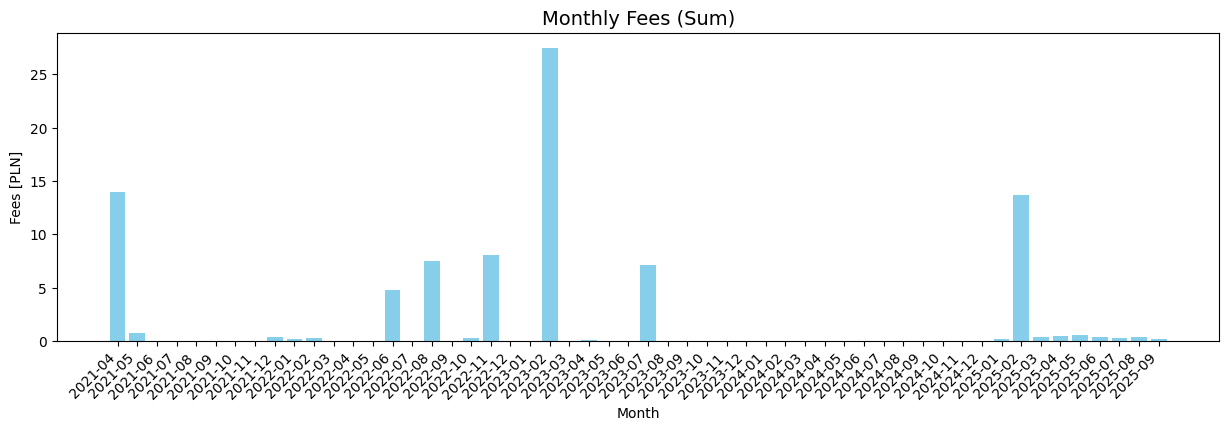

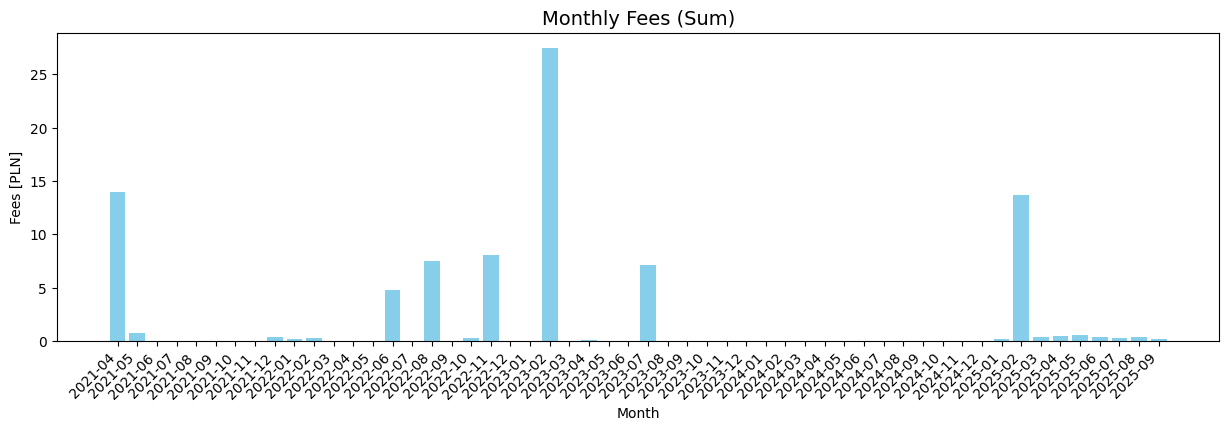

In [17]:
import importlib
from src.viz import plot_monthly_fees
import importlib
import src.viz   # albo inny Twój moduł

importlib.reload(src.viz)


plot_monthly_fees(df_clean)

ValueError: could not convert string to float: '68c700e355b2d8098f98dbf2'

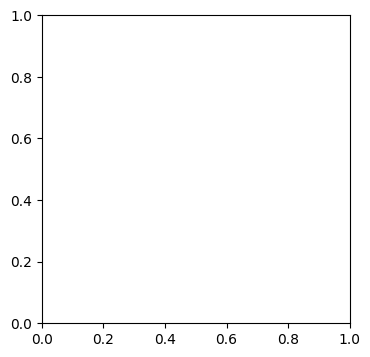

In [67]:
from src.viz import plot_monthly_fees, plot_transaction_type_distribution

plot_transaction_type_distribution(df_clean)

In [19]:
from src.analysis import transaction_type_distribution

transaction_type_distribution(df_clean)

Transaction Type
Buy                         11
Convert                     35
Learning Reward             50
Receive                    223
Retail Eth2 Deprecation      2
Retail Staking Transfer     20
Reward Income              295
Sell                         1
Send                        20
Staking Income             360
Withdrawal                   1
Name: ID, dtype: int64

,ID,Timestamp,Transaction Type,Asset,Quantity Transacted,Price Currency,Price at Transaction,Subtotal,Total (inclusive of fees and/or spread),Fees and/or Spread,Notes,Price at Transaction_clean,Subtotal_clean,Total (inclusive of fees and/or spread)_clean,Fees and/or Spread_clean
0,68c700e355b2d8098f98dbf2,2025-09-14 17:52:35+00:00,Staking Income,ETH,0.000001,PLN,zł16728.6990535592701315065337825,zł0.01978,zł0.01978,zł0.00,NaN,16728.699054,0.01978,0.01978,0.000000
1,68c540ad0fbb7d9c04f33420,2025-09-13 10:00:13+00:00,Staking Income,MATIC,0.124783,PLN,zł1.023734828938927071497094725,zł0.12774,zł0.18077,zł0.053023496254588420953353937,NaN,1.023735,0.12774,0.18077,0.053023
2,68c3231492c8e85f5d7b5b58,2025-09-11 19:29:24+00:00,Staking Income,ETH,0.000004,PLN,zł16036.78199553930357654639381,zł0.06307,zł0.06307,zł0.00,NaN,16036.781996,0.06307,0.06307,0.000000
3,68bf257e8991a802b518864f,2025-09-08 18:50:38+00:00,Staking Income,ETH,0.000004,PLN,zł15649.24884284174051128484748,zł0.06632,zł0.06632,zł0.00,NaN,15649.248843,0.06632,0.06632,0.000000
4,68bea7eea34bc3abc6f20afe,2025-09-08 09:54:54+00:00,Staking Income,MATIC,0.174778,PLN,zł1.01113716755783026303774194,zł0.17672,zł0.25006,zł0.073331348585128168489604104,NaN,1.011137,0.17672,0.25006,0.073331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1013,608e6b103041da0001402fe6,2021-05-02 09:04:16+00:00,Convert,ETC,-0.346740,PLN,zł165.723274725,zł25.74768,zł26.00474,zł0.257056543124265,Converted 0.34674023 ETC to 0.00026606 BTC,165.723275,25.74768,26.00474,0.257057
1014,608e4ee13337cc0001e50aca,2021-05-02 07:04:01+00:00,Convert,MATIC,-20.607863,PLN,zł2.90993322,zł32.19813,zł32.52011,zł0.32198112276621,Converted 20.60786284 MATIC to 0.34674023 ETC,2.909933,32.19813,32.52011,0.321981
1015,608abbb445d2a00001bab4d2,2021-04-29 13:59:16+00:00,Buy,MATIC,8.265514,PLN,zł3.299447788,zł27.27163,zł31.97419,zł4.70256155511085,Bought 8.26551417 MATIC for 31.974194 PLN,3.299448,27.27163,31.97419,4.702562
1016,60872d369fb89800012444ff,2021-04-26 21:14:30+00:00,Buy,MATIC,12.342349,PLN,zł1.8425311212,zł22.74116,zł27.35146,zł4.61030046682357,Bought 12.34234867 MATIC for 27.351462 PLN,1.842531,22.74116,27.35146,4.610300


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Staking Income'),
  Text(1, 0, 'Reward Income'),
  Text(2, 0, 'Receive'),
  Text(3, 0, 'Learning Reward'),
  Text(4, 0, 'Convert'),
  Text(5, 0, 'Send'),
  Text(6, 0, 'Retail Staking Transfer'),
  Text(7, 0, 'Buy'),
  Text(8, 0, 'Retail Eth2 Deprecation'),
  Text(9, 0, 'Sell'),
  Text(10, 0, 'Withdrawal')])

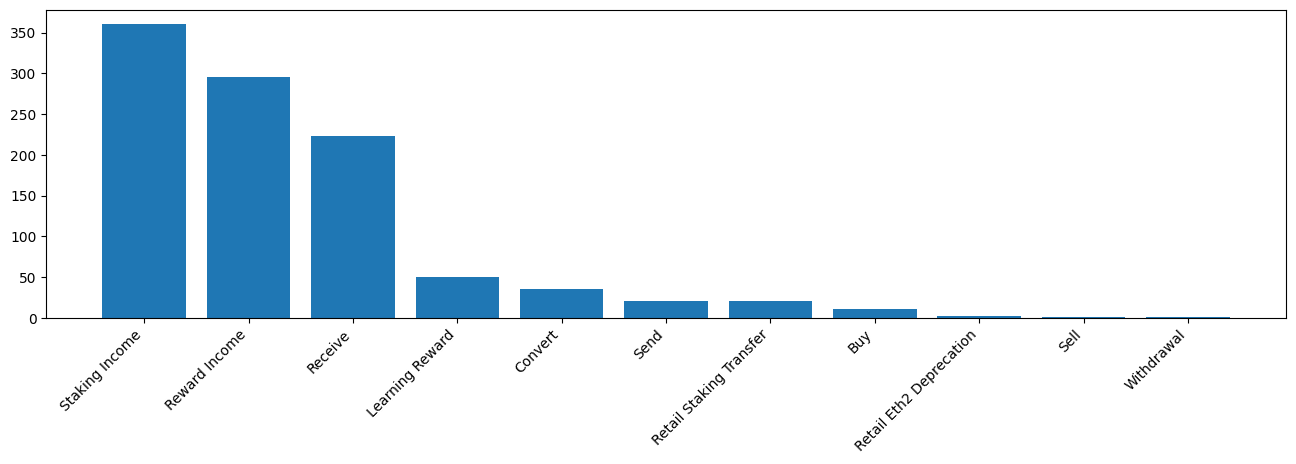

In [60]:
import matplotlib.pyplot as plt

transactions_series = transaction_type_distribution(df_clean)
transactions_series_sorted = transactions_series.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(16,4))
ax.bar(transactions_series_sorted.index,
       transactions_series_sorted.values
           )

plt.xticks(rotation=45, ha="right")

In [80]:
from src.analysis import top_fees

top_fees(df_clean)

,ID,Timestamp,Transaction Type,Asset,Quantity Transacted,Price Currency,Price at Transaction,Subtotal,Total (inclusive of fees and/or spread),Fees and/or Spread,Notes,Price at Transaction_clean,Subtotal_clean,Total (inclusive of fees and/or spread)_clean,Fees and/or Spread_clean
149,67bef5340ddadf21c4150f51,2025-02-26 11:04:20+00:00,Buy,MATIC,253.694393,PLN,zł1.11402568263178755741725935832172,zł282.62207,zł298.07839,zł15.4563228031413542582081218312454624658636,Bought 253.69439287 MATIC for 298.078392000000...,1.114026,282.62207,298.07839,15.456323
485,63f926dc7880070001836e57,2023-02-24 21:06:36+00:00,Buy,MATIC,32.748469,PLN,zł5.70382424535,zł186.79151,zł198.21581,zł11.42429401002446,Bought 32.74846944 MATIC for 198.215808 PLN,5.703824,186.79151,198.21581,11.424294
503,63e16642b2d9e6000136a148,2023-02-06 20:42:42+00:00,Buy,BTC,0.000946,PLN,zł101864.81227845497,zł96.40690,zł104.44740,zł8.04050236342465,Bought 0.00094642 BTC for 104.447398 PLN,101864.812278,96.40690,104.44740,8.040502
480,63fdec92651cf900013e4a1d,2023-02-28 11:59:14+00:00,Buy,MATIC,16.786635,PLN,zł5.426288761009912,zł91.08913,zł99.11815,zł8.0290217534893,Bought 16.78663526 MATIC for 99.118152 PLN,5.426289,91.08913,99.11815,8.029022
690,630b9cec0321690001caaddb,2022-08-28 16:50:52+00:00,Buy,ETH,0.013900,PLN,zł7060.740239310052,zł98.14217,zł105.60979,zł7.46761839566208,Bought 0.0138997 ETH for 105.6097895 PLN,7060.740239,98.14217,105.60979,7.467618


In [85]:
top_fees_df = top_fees(df, n=n)
plot_df = top_fees_df[["Fees and/or Spread_clean", "Notes"]]

plot_df

,Fees and/or Spread_clean,Notes
149,15.456323,Bought 253.69439287 MATIC for 298.078392000000...
485,11.424294,Bought 32.74846944 MATIC for 198.215808 PLN
503,8.040502,Bought 0.00094642 BTC for 104.447398 PLN
480,8.029022,Bought 16.78663526 MATIC for 99.118152 PLN
690,7.467618,Bought 0.0138997 ETH for 105.6097895 PLN


In [86]:
from src.viz import plot_top_fees

plot_top_fees(df_clean)

ImportError: cannot import name 'plot_top_fees' from 'src.viz' (c:\Users\micha\Desktop\coinbase-etl\src\viz.py)

c:\Users\micha\Desktop\coinbase-etl\src\analysis.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  return df.groupby(df["Timestamp"].dt.to_period("M"))["Fees and/or Spread_clean"].sum()


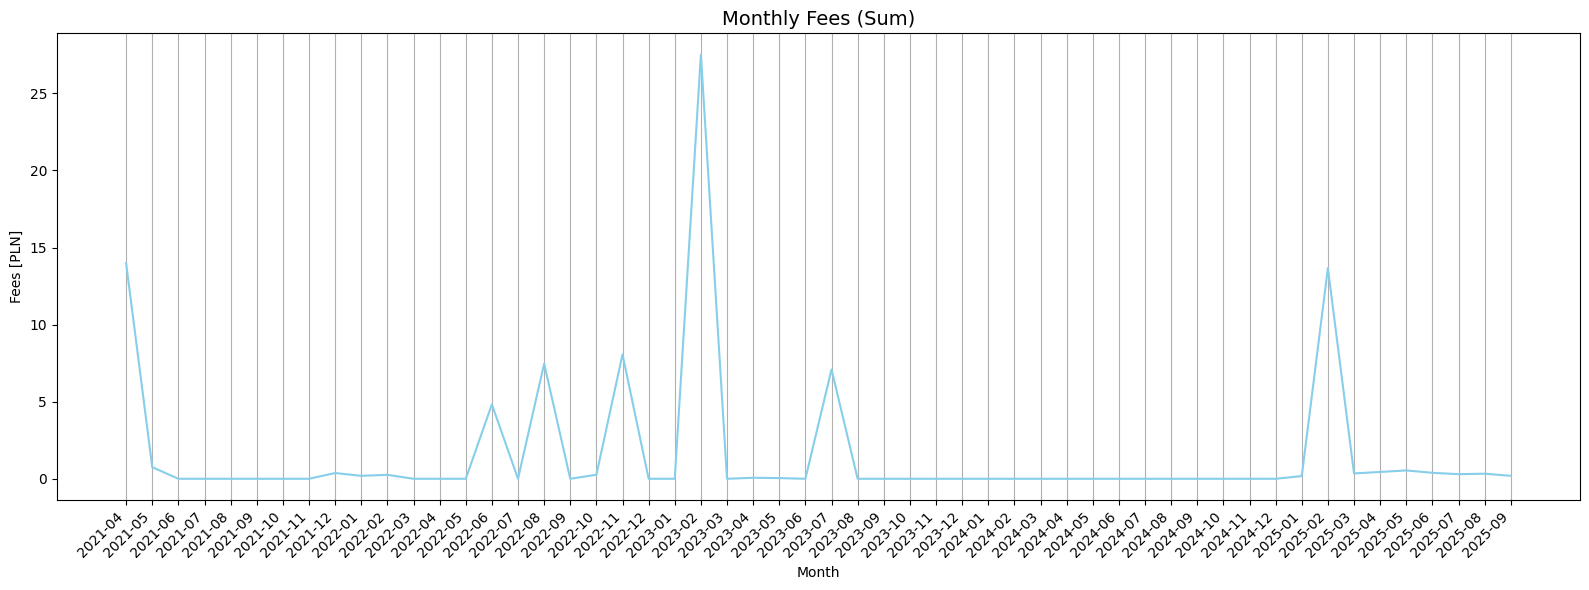

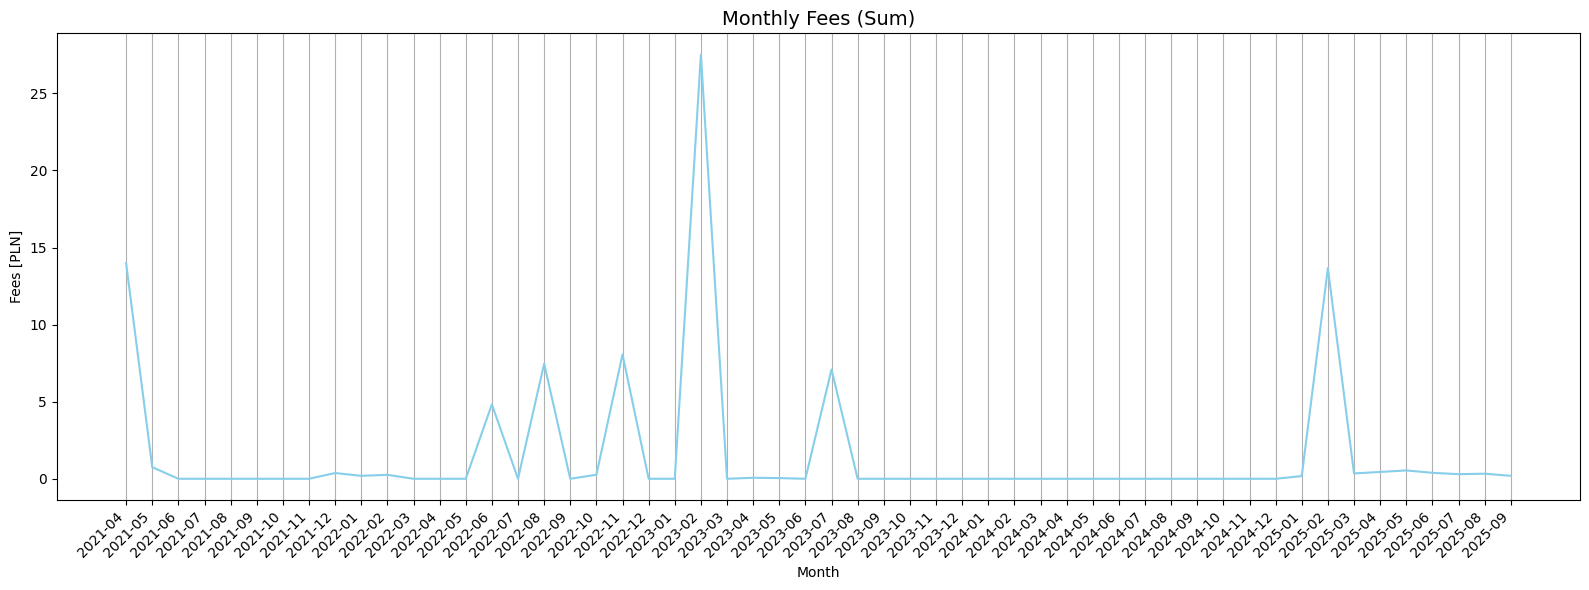

In [102]:
import importlib
import src.viz

# Odśwież moduł
importlib.reload(src.viz)


from src.viz import plot_monthly_fees

plot_monthly_fees(df_clean)

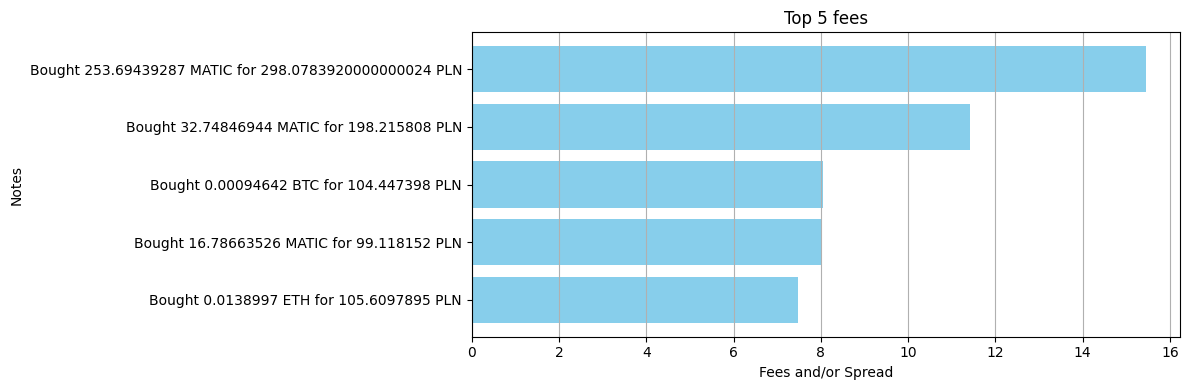

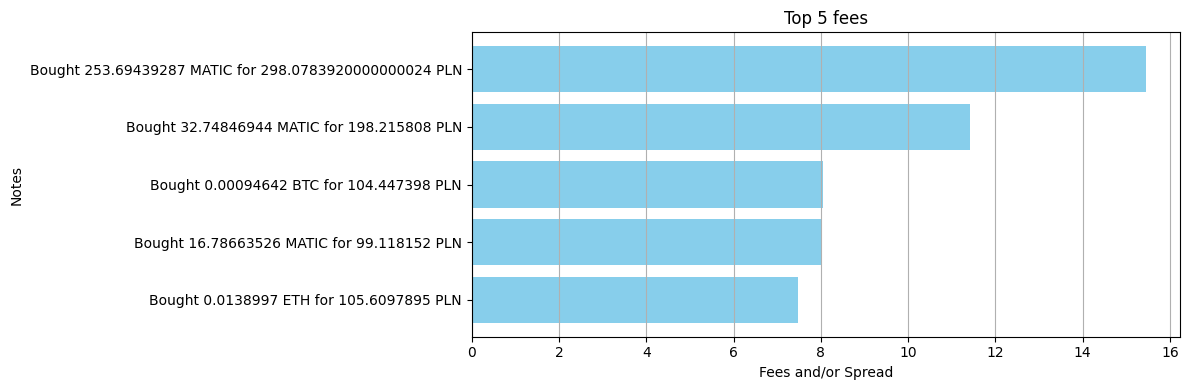

In [115]:
import importlib
import src.viz

# Odśwież moduł
importlib.reload(src.viz)
from src.viz import plot_top_fees

plot_top_fees(df_clean)

In [79]:
from src.analysis import average_fee_of_transaction_type

average_fee_of_transaction_type(df_clean)

7.02612373265515

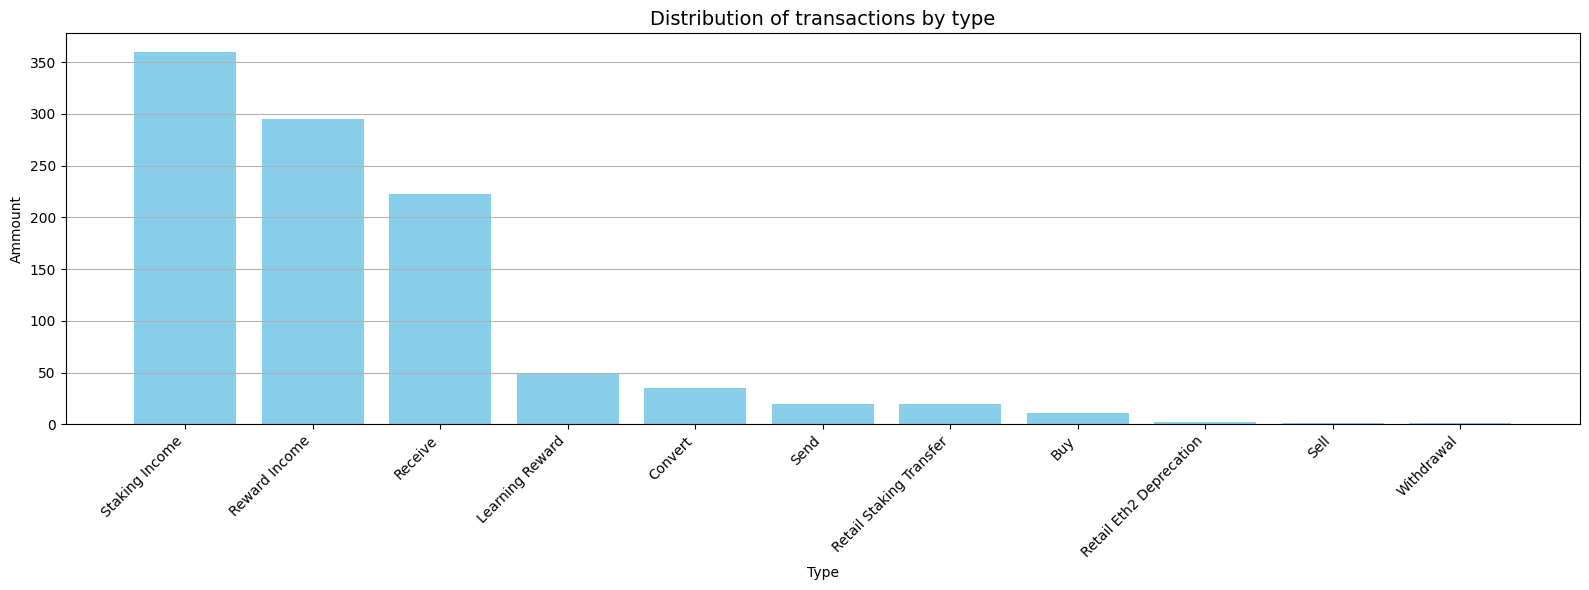

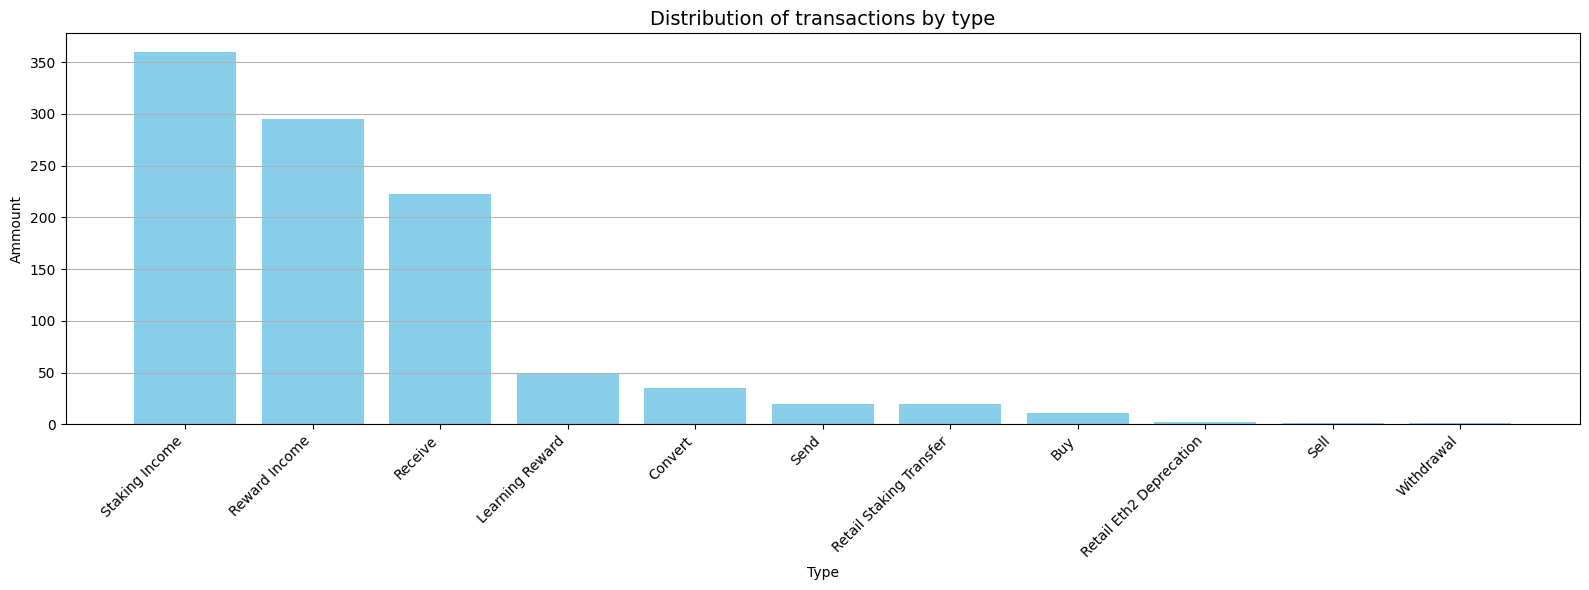

In [116]:
from src.viz import plot_transaction_type_distribution

plot_transaction_type_distribution(df_clean)

In [119]:
df_clean["Price Currency"].unique()

array(['PLN'], dtype=object)